In [1]:
#IMPORTACION DE LIBRERIAS PARA LA MUESTRA DE LA MATRIZ DE CONFUSION SOBRE EL DATASET DE TEST
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
#DATOS SOBRE LAS FOTOGRAFIAS Y SU TAMAÑO DE GESTIONAMIENTO
width_shape = 100
height_shape = 100
batch_size = 10
#NUMERO DE CLASES 
names = ['Clase 1','Clase 2','Clase 3','Clase 4','Clase 5',
         'Clase 6','Clase 7','Clase 8']
#FUENTE DE DATOS PARA TEST
test_data_dir = './CarneDataset/test'  
#IMAGEDATAGENERATOR PARA LA CONFIGURACION DE RECUPERACION DE INFORMAION
test_datagen = ImageDataGenerator()
#CONFIGURACION DE FUNCION PARA GENERAR DATOS PARA EL TEST
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(width_shape, height_shape), 
    batch_size = batch_size,
    class_mode='categorical', 
    shuffle=False)
#INFO DEL MODELO GENERADO A RAIZ DEL ENTRENAMIENTO
custom_Model= load_model("./modelo/modelo.h5")
#GENERACION DE LAS PREDICCIONES
predictions = custom_Model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)
y_real = test_generator.classes

Found 810 images belonging to 8 classes.
81/81 [==============================] - 8s 101ms/step


In [4]:
matc=confusion_matrix(y_real, y_pred)

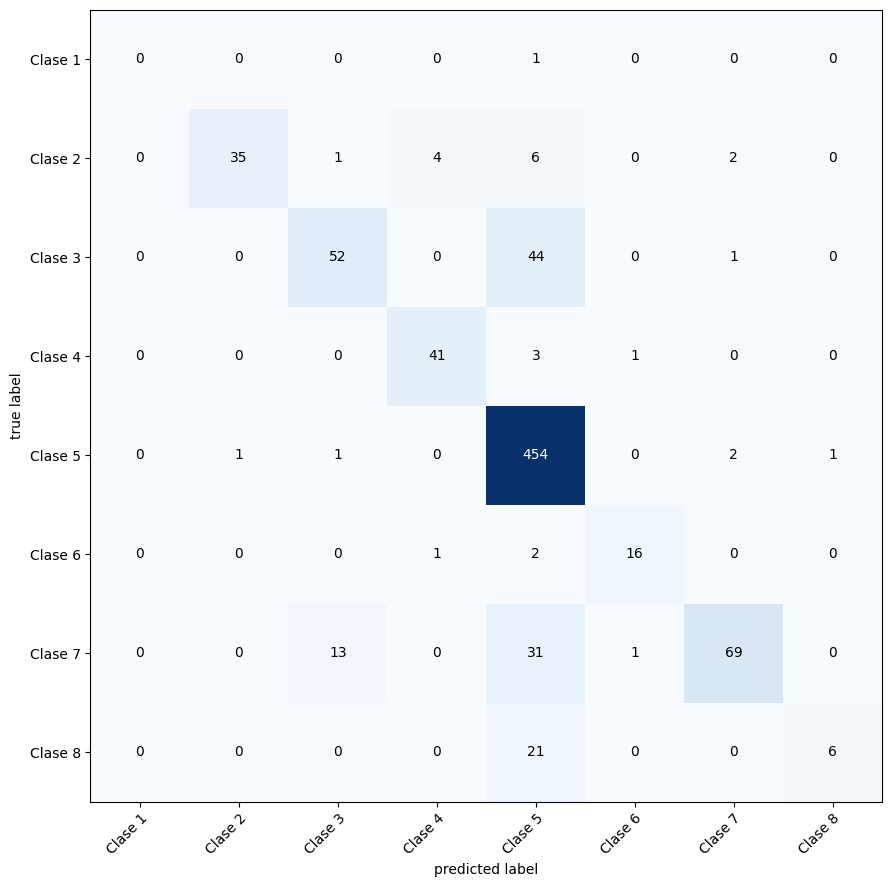

In [5]:
#GRAFICACION DE LOS DATOS Y SUS PREDICCIONES
plot_confusion_matrix(conf_mat=matc, figsize=(9,9), class_names = names, show_normed=False)
plt.tight_layout()

In [6]:
#TABLA PARA VERIFICACION DE PARAMETROS DE CLASIFICACION
print(metrics.classification_report(y_real, y_pred, digits=2, zero_division=1))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00         1
           1       0.97      0.73      0.83        48
           2       0.78      0.54      0.63        97
           3       0.89      0.91      0.90        45
           4       0.81      0.99      0.89       459
           5       0.89      0.84      0.86        19
           6       0.93      0.61      0.73       114
           7       0.86      0.22      0.35        27

    accuracy                           0.83       810
   macro avg       0.89      0.60      0.65       810
weighted avg       0.84      0.83      0.81       810

